In [96]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import dask.array as da
import numcodecs

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

import intake     # For catalogs
import zarr       # Data Formatting


In [97]:
plt.rcParams['figure.figsize'] = [12, 8]

In [98]:
opth='/global/cfs/cdirs/m4549/scream-cess-healpix/'
#opth='/pscratch/sd/a/agett/scream/cess-copy/'

### Catalog test

In [99]:
catfn='/global/u1/a/agett/python/hackathon/scream_catalog.yaml'
scream_cat = intake.open_catalog(catfn)

# List different 'types' of data
print (list (scream_cat)) 


['scream2D_hrly', 'scream2D_ne120', 'scream3D_ne120', 'scream_lnd']


In [112]:
print(scream_cat.scream2D_hrly.describe())

{'name': 'scream2D_hrly', 'container': 'xarray', 'plugin': ['zarr'], 'driver': ['zarr'], 'description': '', 'direct_access': 'forbid', 'user_parameters': [{'name': 'var', 'description': 'variables', 'type': 'str', 'allowed': ['rlut', 'pr'], 'default': 'rlut'}, {'name': 'zoom', 'description': 'zoom resolution of the dataset', 'type': 'int', 'allowed': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], 'default': 2}], 'metadata': {'project': 'global_hackathon', 'experiment_id': 'dyamond3', 'source_id': 'SCREAM', 'simulation_id': 'cess-control.ne1024pg2_ne1024pg2.F2010-SCREAMv1.cess-oct2', 'time_start': datetime.datetime(2019, 8, 1, 0, 0), 'time_end': datetime.datetime(2020, 9, 1, 0, 0)}, 'args': {'chunks': None, 'consolidated': True, 'urlpath': '/global/cfs/cdirs/m4549/scream-cess-healpix/scream2D_hrly_{{ var }}_hp{{ zoom }}_v6.zarr'}}


In [70]:
z=8
ds_cat = scream_cat.scream2D_ne120(zoom=z).to_dask()

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [71]:
ds_cat

<xarray.Dataset> Size: 299GB
Dimensions:          (time: 3168, cell: 786432, crs: 0)
Coordinates:
  * crs              (crs) float64 0B 
  * time             (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00...
Dimensions without coordinates: cell
Data variables: (12/30)
    clt              (time, cell) float32 10GB ...
    hflsd            (time, cell) float32 10GB ...
    hfssd            (time, cell) float32 10GB ...
    huss             (time, cell) float32 10GB ...
    lwcre            (time, cell) float32 10GB ...
    pr               (time, cell) float32 10GB ...
    ...               ...
    tas              (time, cell) float32 10GB ...
    tauu             (time, cell) float32 10GB ...
    tauv             (time, cell) float32 10GB ...
    ts               (time, cell) float32 10GB ...
    uas              (time, cell) float32 10GB ...
    vas              (time, cell) float32 10GB ...
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          3
    averaging_frequency_units:    nhours
    averaging_type:               AVERAGE
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

Text(0.5, 1.0, 'SCREAM pr 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

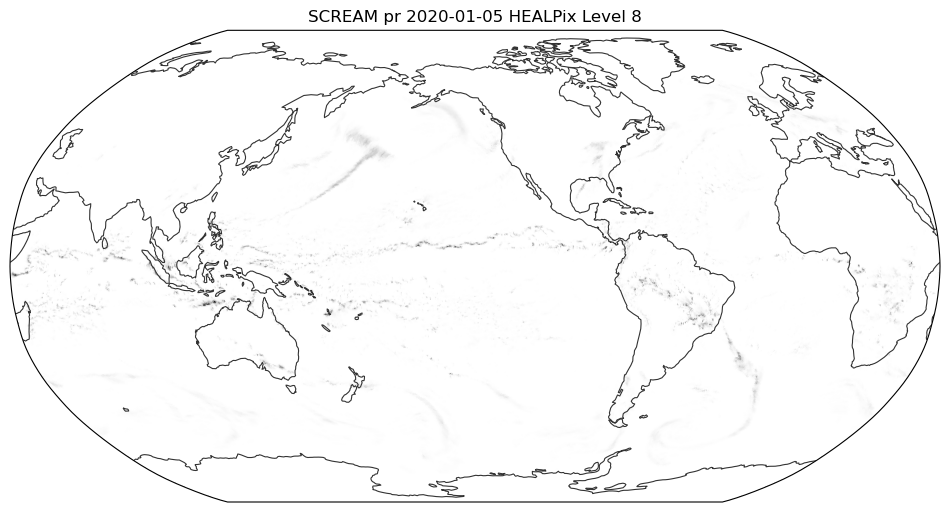

In [72]:
vart='pr'
tm='2020-01-05'
tmp=ds_cat[vart].sel(time=tm)[0]

egh.healpix_show(tmp,cmap='binary')
plt.title('SCREAM '+vart+' '+tm+' HEALPix Level '+str(z))

### What to do about different variables in indivudal Zarr files? Also in catalog...

In [73]:
vt='rlut'
z=8
ds_hr = scream_cat.scream2D_hrly(var=vt,zoom=z).to_dask()

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [74]:
ds_hr

<xarray.Dataset> Size: 30GB
Dimensions:  (crs: 0, time: 9457, cell: 786432)
Coordinates:
  * crs      (crs) float64 0B 
  * time     (time) object 76kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
Dimensions without coordinates: cell
Data variables:
    rlut     (time, cell) float32 30GB ...
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          1
    averaging_frequency_units:    nhours
    averaging_type:               INSTANT
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

Text(0.5, 1.0, 'SCREAM rlut 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

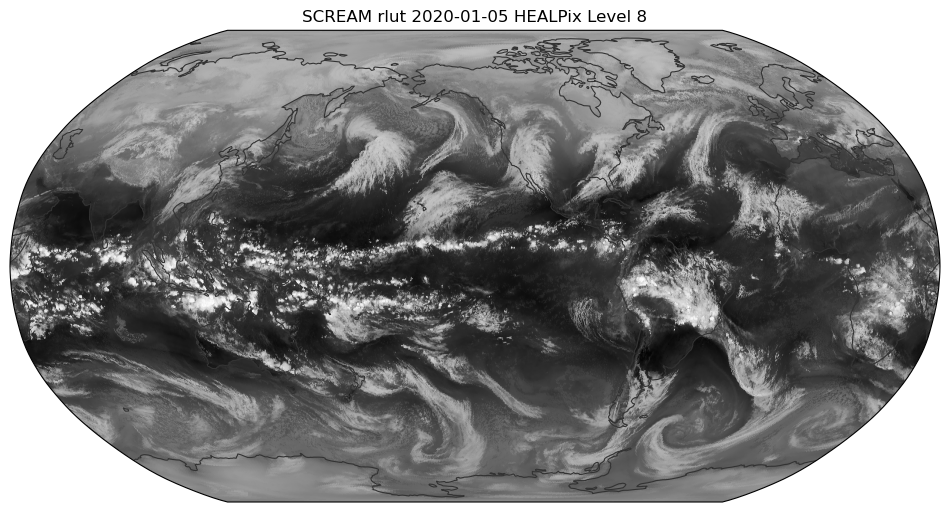

In [75]:
tm='2020-01-05'
tmp=ds_hr[vt].sel(time=tm)[0]

egh.healpix_show(tmp,cmap='binary')
plt.title('SCREAM '+vt+' '+tm+' HEALPix Level '+str(z))

### Land Variables

In [84]:
vt='mrso'
z=8
ds_lnd = scream_cat.scream_lnd(var=vt,zoom=z).to_dask()

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [85]:
#ds_lnd

Text(0.5, 1.0, 'SCREAM mrso 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

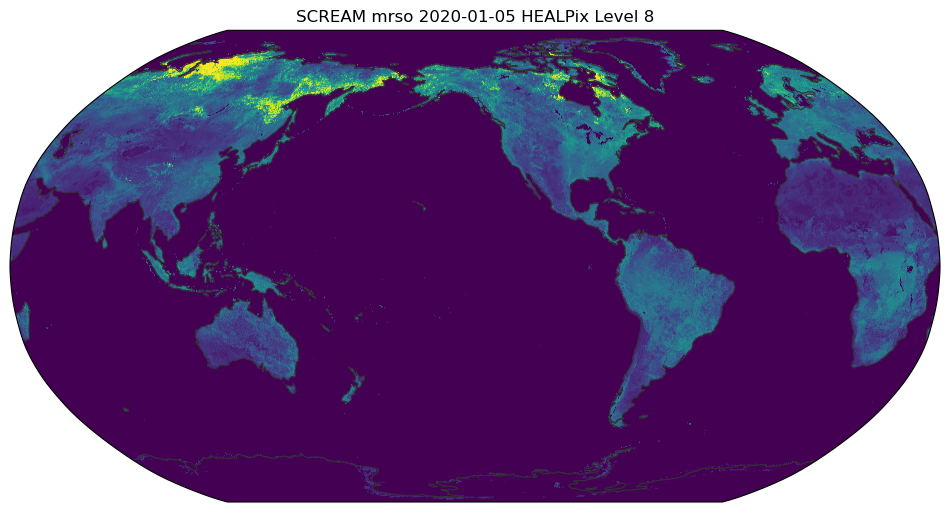

In [86]:
tm='2020-01-05'
tmp=ds_lnd[vt].sel(time=tm)[0]

egh.healpix_show(tmp)
plt.title('SCREAM '+vt+' '+tm+' HEALPix Level '+str(z))

### 3D variables

In [87]:
vt='ta'
z=8
ds_3d = scream_cat.scream3D_ne120(var=vt,zoom=z).to_dask()
ds_3d

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 249GB
Dimensions:  (crs: 0, level: 25, time: 3168, cell: 786432)
Coordinates:
  * crs      (crs) float64 0B 
    lev      (level) int64 200B ...
  * time     (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00:00:00
Dimensions without coordinates: level, cell
Data variables:
    ta       (time, level, cell) float32 249GB ...

In [92]:
ds_3d=ds_3d.pipe(egh.attach_coords)

tm='2020-01-05'
tmp=ds_3d[vt].sel(time=tm)[0]

zm = (
    tmp
    .groupby("lat")
    .mean()
).compute()

In [93]:
zm

<xarray.DataArray 'ta' (level: 25, lat: 1023)> Size: 102kB
array([[      nan,   0.     ,   0.     , ...,   0.     ,   0.     ,
              nan],
       [      nan, 263.87076, 263.8872 , ..., 218.29509, 218.3982 ,
              nan],
       [      nan, 245.9084 , 245.88966, ..., 216.73215, 216.83246,
              nan],
       ...,
       [      nan,   0.     ,   0.     , ..., 247.9145 , 247.90862,
              nan],
       [      nan,   0.     ,   0.     , ..., 242.31195, 242.27747,
              nan],
       [      nan,   0.     ,   0.     , ...,   0.     ,   0.     ,
              nan]], shape=(25, 1023), dtype=float32)
Coordinates:
    lev      (level) int64 200B 1 5 10 20 30 50 70 ... 875 900 925 950 975 1000
    time     object 8B 2020-01-05 00:00:00
    crs      int64 8B 0
  * lat      (lat) float64 8kB -89.82 -89.63 -89.45 -89.27 ... 89.45 89.63 89.82
Dimensions without coordinates: level
Attributes:
    averaging_count_tracker:  avg_count_Scalar3D_ncol_lev
    long_name:                T_mid
    units:                    K

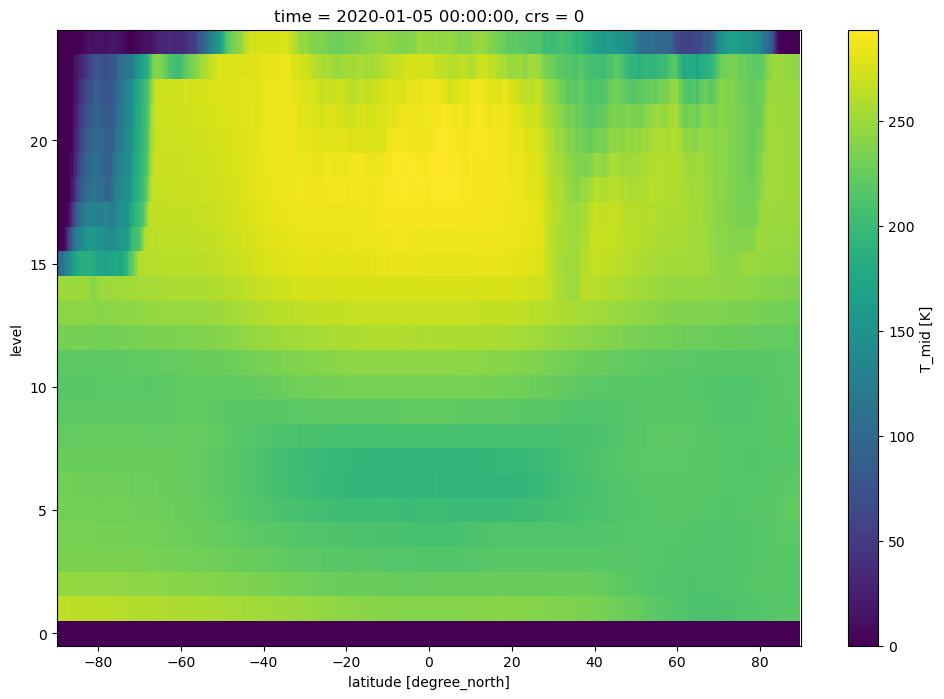

In [95]:
zm.plot()